#Import Library

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas.util.testing as tm
import pandas as pd
from pandas import Timestamp
import numpy as np

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Load Data

In [ ]:
macro_data = pd.read_csv('coba dulu_allvar.csv')
print(macro_data.shape)  
macro_data.head()

(4881, 4)


,date,suhu,kelembaban_tanah,tanaman_optimal
0,25/08/2021 1:00:00,36.0,28.0,KURANG OPTIMAL
1,25/08/2021 2:00:00,35.0,28.0,KURANG OPTIMAL
2,25/08/2021 3:00:00,33.0,28.0,KURANG OPTIMAL
3,25/08/2021 4:00:00,31.0,28.0,KURANG OPTIMAL
4,25/08/2021 5:00:00,29.0,28.0,KURANG OPTIMAL


In [ ]:
parse_dates=['date'], index_col='date')

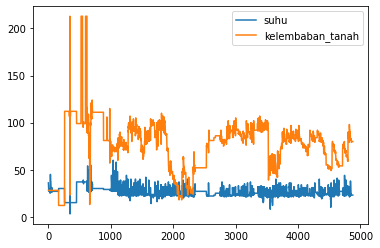

In [ ]:
macro_data.dropna().plot()

In [ ]:
import plotly.express as px

In [ ]:
fig = px.line(macro_data, x='date', y='tanaman_optimal ')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

#Melakukan P-Value Test 

In [ ]:
ad_fuller_result_1 = adfuller(macro_data['suhu'].diff()[1:])

print('suhu')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(macro_data['kelembaban_tanah'].diff()[1:])

print('kelembaban_tanah')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')


suhu
ADF Statistic: -19.94692167067179
p-value: 0.0

---------------------

kelembaban_tanah
ADF Statistic: -17.661527665514946
p-value: 3.6801923518356384e-30

---------------------



# Melakukan Granger Causality Test

In [ ]:
print('suhu causes kelembaban_tanah?\n')
print('------------------')
granger_1 = grangercausalitytests(macro_data[['kelembaban_tanah', 'suhu']], 4)
print ()
print('kelembaban_tanah causes suhu?\n')
print('------------------')
granger_2 = grangercausalitytests(macro_data[['suhu', 'kelembaban_tanah']], 4
)

suhu causes kelembaban_tanah?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.7222  , p=0.0168  , df_denom=4877, df_num=1
ssr based chi2 test:   chi2=5.7257  , p=0.0167  , df=1
likelihood ratio test: chi2=5.7223  , p=0.0168  , df=1
parameter F test:         F=5.7222  , p=0.0168  , df_denom=4877, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.2860  , p=0.1018  , df_denom=4874, df_num=2
ssr based chi2 test:   chi2=4.5768  , p=0.1014  , df=2
likelihood ratio test: chi2=4.5746  , p=0.1015  , df=2
parameter F test:         F=2.2860  , p=0.1018  , df_denom=4874, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=17.1938 , p=0.0000  , df_denom=4871, df_num=3
ssr based chi2 test:   chi2=51.6556 , p=0.0000  , df=3
likelihood ratio test: chi2=51.3840 , p=0.0000  , df=3
parameter F test:         F=17.1938 , p=0.0000  , df_denom=4871, df_num=3

Granger Causality
number of lags (no 

#Definisian Kolom Kelembaban_Tanah dan suhu kedalam variabel macro_data

In [ ]:
micro_data = macro_data[['kelembaban_tanah','suhu']]
print(macro_data.shape)

(4881, 2)


#Split Data Train dan Test

In [ ]:
train_df=micro_data[:-4710]
test_df=micro_data[-90:]

In [ ]:
print(test_df.shape)

(90, 2)


#Menampilkan Parameter AIC,BIC,FPE,dan HQIC untuk menentukan jumlah lags yang akan digunakan 

In [ ]:
model = VAR(train_df.diff()[1:])

In [ ]:
sorted_order=model.select_order(maxlags=25)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        1.279       1.320       3.592       1.295
1       1.192*      1.316*      3.295*      1.242*
2        1.207       1.412       3.343       1.290
3        1.247       1.534       3.480       1.364
4        1.297       1.667       3.660       1.447
5        1.351       1.803       3.864       1.535
6        1.406       1.940       4.084       1.623
7        1.444       2.060       4.244       1.694
8        1.497       2.195       4.479       1.781
9        1.548       2.328       4.715       1.865
10       1.594       2.456       4.941       1.944
11       1.632       2.577       5.144       2.016
12       1.687       2.713       5.439       2.104
13       1.714       2.823       5.601       2.165
14       1.767       2.958       5.920       2.251
15       1.814       3.087       6.216       2.331
16       1.865       3.220     

#Membuat Var Model Dengan VARMAX

In [ ]:
var_model = VARMAX(train_df, order=(1 ,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                                Statespace Model Results                                
Dep. Variable:     ['kelembaban_tanah', 'suhu']   No. Observations:                  171
Model:                                   VAR(1)   Log Likelihood                -572.328
                                    + intercept   AIC                           1162.655
Date:                          Sat, 18 Jun 2022   BIC                           1190.930
Time:                                  11:11:37   HQIC                          1174.128
Sample:                                       0                                         
                                          - 171                                         
Covariance Type:                            opg                                         
Ljung-Box (Q):                 0.05, 65.31   Jarque-Bera (JB):   198532.87, 20737.49
Prob(Q):                        1.00, 0.01   Prob(JB):                    0.00, 0.00
Heteroskedasticity (H):      

# Membuat Prediksi

In [ ]:
n_forecast = 90
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)

predictions=predict.predicted_mean

In [ ]:
predictions.columns=['Kelembaban_tanah_predicted','Suhu_predicted']
predictions

,Kelembaban_tanah_predicted,Suhu_predicted
171,12.131115,30.149972
172,12.261020,30.284770
173,12.389691,30.405726
174,12.517112,30.514058
175,12.643267,30.610877
...,...,...
256,19.175105,30.458854
257,19.221550,30.448363
258,19.267414,30.437998
259,19.312706,30.427757


In [ ]:
import pandas as pd
from pandas import Timestamp

#Menampilkan MSE dan RMSE

In [ ]:
from sklearn.metrics import mean_squared_error
import math 
from statistics import mean

rmse_kelembaban_tanah=math.sqrt(mean_squared_error(predictions['Kelembaban_tanah_predicted'],test_df['kelembaban_tanah']))
print('Mean value of kelembaban_tanah is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['kelembaban_tanah']),rmse_kelembaban_tanah))
rmse_suhu=math.sqrt(mean_squared_error(predictions['Suhu_predicted'],test_df['suhu']))
print('Mean value of suhu is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['suhu']),rmse_suhu))


Mean value of kelembaban_tanah is : 81.46666666666667. Root Mean Squared Error is :65.68126184764161
Mean value of suhu is : 25.466666666666665. Root Mean Squared Error is :6.635941100455839


# Dapat dilihat bahwa pada kelembaban_tanah nilai RMSE terhadap MSE mencapai 19%. Lalu untuk suhu nilai RMSE terhadap MSE mencapai 28%. Oleh karena itu, dapat disimpulkan bahwa pada Variabel Suhu sudah mendekati baik model prediksinya.